# SVC Model Training

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import csv
import random

In [25]:


# Define cluster centers and spreads based on existing data
cluster1_center = (2.5, 2.8)  # target=1
cluster2_center = (5.5, 6.0)  # target=2
spread = 0.7

# Generate 1000 new rows
new_data = []
for _ in range(1000):
    target = random.choice([1, 2])
    if target == 1:
        feature1 = random.gauss(cluster1_center[0], spread)
        feature2 = random.gauss(cluster1_center[1], spread)
    else:
        feature1 = random.gauss(cluster2_center[0], spread)
        feature2 = random.gauss(cluster2_center[1], spread)
    
    new_data.append([feature1, feature2, target])

# Append to existing CSV
with open('data.csv', 'a', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(new_data)

print("1000 rows added successfully!")


1000 rows added successfully!


In [26]:
# Generate dataset
np.random.seed(42)
df = pd.DataFrame({
    'feature1': np.concatenate([np.random.uniform(1.5, 3.5, 15), np.random.uniform(4.5, 6.5, 15)]),
    'feature2': np.concatenate([np.random.uniform(2.0, 4.0, 15), np.random.uniform(5.0, 7.0, 15)]),
    'target': np.concatenate([np.ones(15, dtype=int), np.full(15, 2, dtype=int)])
})

# Prepare data
X = df[['feature1', 'feature2']].values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVC
svc_model = SVC(kernel='linear', C=1.0, random_state=42)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

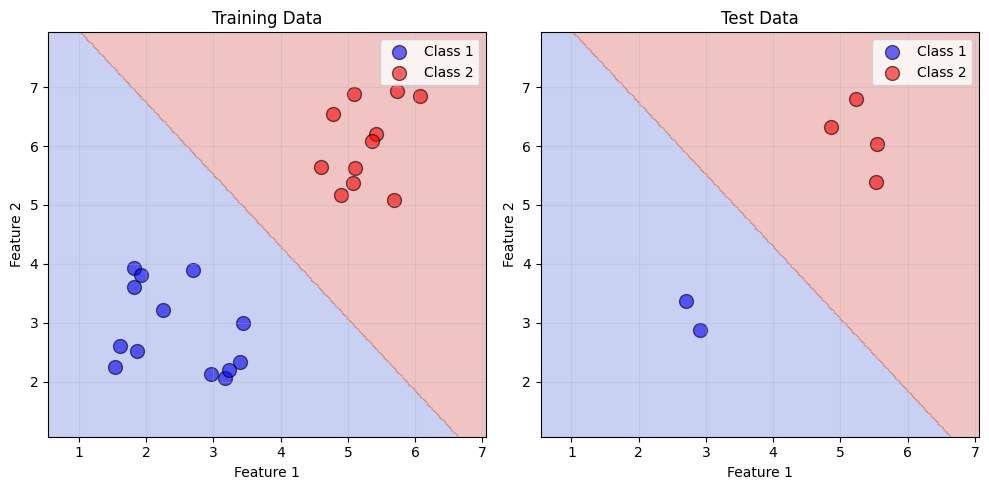

In [27]:
# Visualize decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 5))
colors = {1: 'blue', 2: 'red'}

# Training data
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
for target in np.unique(y_train):
    subset = X_train[y_train == target]
    plt.scatter(subset[:, 0], subset[:, 1], c=colors[target], label=f'Class {target}', alpha=0.6, s=100, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data')
plt.legend()
plt.grid(True, alpha=0.3)

# Test data
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
for target in np.unique(y_test):
    subset = X_test[y_test == target]
    plt.scatter(subset[:, 0], subset[:, 1], c=colors[target], label=f'Class {target}', alpha=0.6, s=100, edgecolors='k')
misclassified = X_test[y_test != y_pred]
if len(misclassified) > 0:
    plt.scatter(misclassified[:, 0], misclassified[:, 1], c='yellow', marker='x', s=200, linewidths=3, label='Misclassified', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()